In [38]:
import cv2
import numpy as np
from cv2 import VideoWriter, VideoWriter_fourcc
from pdb import set_trace
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from pdb import set_trace

In [63]:
def GenerateData():
    width = 64
    height = 64
    seconds = 10
    radius = 1
    FPS=24
    paint_h = int(height/2)
    VideoData = []
    fourcc = VideoWriter_fourcc(*'MP42')
    video = VideoWriter('./data/circle_noise1.avi', fourcc, float(FPS), (width, height))

    #Design the testing data
    for paint_x in range(-radius, width+radius+1, 1):
        frame = 255*np.ones((height, width), dtype=np.uint8)
        cv2.circle(frame, (paint_x, paint_h), radius, (0, 0, 0), -1)
        video.write(cv2.cvtColor(frame,cv2.COLOR_GRAY2BGR))
        VideoData.append(frame)
        
    video.release()

    VideoTrain = np.stack(VideoData, axis=0)

#     for paint_x in range(-radius, width+radius+1, 2):
#         frame = 255*np.ones( 
#                        (height, width), 
#                                   dtype=np.double)
#         cv2.circle(frame, (paint_x, paint_h), radius, (0, 0), -1)
#         VideoData.append(frame)

#     VideoTest = np.stack(VideoData, axis=0)

    return torch.tensor(VideoTrain,dtype=torch.float)

In [77]:
VideoTrain = GenerateData()
index = 50
print(VideoTrain.shape[0])
VideoIn = VideoTrain[:-1]
VideoOut = VideoTrain[1:]
print(VideoIn.shape[0])
print(VideoOut.shape[0])

67
66
66


In [94]:
#Define the architecture for the RNN
from pdb import set_trace
class RNN(nn.Module):
    def __init__(self, dt, height, width, frames):
        super(RNN, self).__init__()
        self.dt = dt
        self.height = height
        self.width = width
        self.W = nn.Parameter(255*torch.ones(frames, height, width))
        self.b = nn.Parameter(255*torch.ones(frames, height, width))
        
    def forward(self,X):
        # Make the dynamics here
        # Extract the image of the object
        # Define the parameters for the new position
        # Predict the object there
        frames = X.shape[0]
        output = []
        for i in range(frames):
            #Extract the indices of the object
            param = torch.matmul(self.W[i], X[i]) + self.b[i]
#             newframe = X[i] + self.dt*param
            genframe = param + self.dt*param
            output.append(genframe)
           
        return torch.stack(output, axis=0)

In [95]:
rnn = RNN(1/24, 64,64, 67)
optimizer = torch.optim.Adam(rnn.parameters(), lr=1e-1)
n_epochs = 10000
delay = 5
lossfn = nn.MSELoss()

In [ ]:
for i in range(n_epochs):
    output = rnn(VideoIn)
    loss = lossfn(output, VideoOut)
    if (i%delay == 0):
        print(loss.item())
    loss.backward()
    optimizer.step()

18748591308800.0
18677302820864.0
18604089147392.0
18526505009152.0
18444508463104.0
18358523133952.0
18268907634688.0
18176192544768.0
18080669368320.0
17982916919296.0
17883220410368.0
17781875539968.0
17679215755264.0
17575492714496.0
17470844829696.0
17365498593280.0
17259557814272.0
17153188167680.0
17046469345280.0
16939511447552.0
16832314474496.0
16725059829760.0
16617702424576.0
16510342922240.0
16403065208832.0
16295793786880.0
16188669165568.0
16081614798848.0
15974801604608.0
15868116336640.0
15761659658240.0
15655423180800.0
15549418438656.0
15443668500480.0
15338218455040.0
15233016922112.0
15128100601856.0
15023505145856.0
14919242088448.0
14815282069504.0
14711654449152.0
14608361324544.0
14505393258496.0
14402819457024.0
14300552888320.0
14198702604288.0
14097152212992.0
13996035932160.0
13895252049920.0
13794872918016.0
13694873370624.0
13595249213440.0
13495995203584.0
13397127069696.0
13298682560512.0
13200633364480.0
13102971092992.0
13005732446208.0
12908870238208

2160160669696.0
2183459110912.0
2206837768192.0
2230294937600.0
2253832847360.0
2277447565312.0
2301131489280.0
2324896940032.0
2348732907520.0
2372644110336.0
2396627927040.0
2420682522624.0
2444807372800.0
2469003264000.0
2493269934080.0
2517600305152.0
2541997522944.0
2566466830336.0
2590992760832.0
2615589470208.0
2640253288448.0
2664974254080.0
2689754202112.0
2714598637568.0
2739503890432.0
2764469436416.0
2789492916224.0
2814569086976.0
2839706599424.0
2864897327104.0
2890139697152.0
2915435544576.0
2940787228672.0
2966190292992.0
2991645523968.0
3017152397312.0
3042705932288.0
3068302458880.0
3093951676416.0
3119648342016.0
3145381707776.0
3171172220928.0
3196994453504.0
3222858891264.0
3248768942080.0
3274717790208.0
3300707270656.0
3326735286272.0
3352804982784.0
3378900369408.0
3405042155520.0
3431210156032.0
3457413021696.0
3483651014656.0
3509921775616.0
3536225304576.0
3562547707904.0
3588905500672.0
3615289769984.0
3641700515840.0
3668140621824.0
3694597767168.0
37210816

1298806865920.0
1273265651712.0
1247973998592.0
1222931251200.0
1198139375616.0
1173596930048.0
1149305094144.0
1125266096128.0
1101480460288.0
1077948579840.0
1054669930496.0
1031643136000.0
1008873766912.0
986360250368.0
964103569408.0
942100316160.0
920355799040.0
898869755904.0
877638582272.0
856666800128.0
835952246784.0
815495380992.0
795299741696.0
775360937984.0
755681853440.0
736260915200.0
717099630592.0
698198786048.0
679555432448.0
661172846592.0
643050307584.0
625186570240.0
607581700096.0
590238121984.0
573152165888.0
556326649856.0
539758952448.0
523451269120.0
507402485760.0
491612504064.0
476081192960.0
460807962624.0
445793173504.0
431036137472.0
416536952832.0
402295095296.0
388310138880.0
374581690368.0
361110175744.0
347894743040.0
334935097344.0
322230583296.0
309781200896.0
297586229248.0
285645504512.0
273958780928.0
262525042688.0
251344273408.0
240415703040.0
229739315200.0
219314028544.0
209139630080.0
199215710208.0
189541171200.0
180116045824.0
170939744256

(64, 64)
[[9515.71  9515.71  9515.71  ... 9515.71  9515.71  9515.71 ]
 [9515.71  9515.71  9515.71  ... 9515.71  9515.71  9515.71 ]
 [9515.71  9515.71  9515.71  ... 9515.71  9515.71  9515.71 ]
 ...
 [9515.644 9515.644 9515.644 ... 9515.644 9515.644 9515.644]
 [9515.644 9515.644 9515.644 ... 9515.644 9515.644 9515.644]
 [9515.644 9515.644 9515.644 ... 9515.644 9515.644 9515.644]]


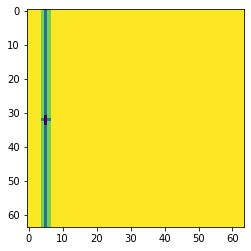

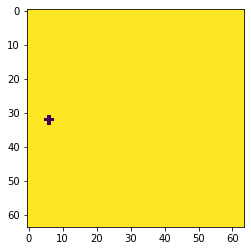

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


In [93]:
index=6
print(output.detach().numpy()[index].shape)
print(output.detach().numpy()[index])
plt.imshow(output.detach().numpy()[index])
plt.show()
plt.imshow(Truedat.detach().numpy()[index])
plt.show()
print(Truedat.detach().numpy()[index])

In [89]:
print(list(rnn.parameters())[1].shape)

torch.Size([67, 64, 64])


In [91]:
height = 64
width = 64
fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./data/project.avi', fourcc, float(24), (width, height))

print(len(output))
for i in range(len(output)):
    
    video.write(cv2.cvtColor((output[i].detach().numpy()*255).astype(np.uint8),cv2.COLOR_GRAY2BGR))
video.release()

66


In [92]:
print(optimizer.param_groups[0]['params'][2].shape)

IndexError: list index out of range